In [1]:
# IMPORT REQUIRED LIBRARIES

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import KFold, cross_val_predict, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

SEED = 9

In [2]:
# IMPORT PROCESSED DATA

abs_df = pd.read_csv("C:\\Users\\argan\\OneDrive\\Desktop\\DDP\\Final Data\\TurkishAbs.csv", index_col=0)

abs_df.drop('Name', axis='columns', inplace=True)

wavelengths = abs_df.iloc[:, :-2].columns

abs_df.head()

,410 nm,435 nm,460 nm,485 nm,510 nm,535 nm,560 nm,585 nm,610 nm,645 nm,680 nm,705 nm,730 nm,760 nm,810 nm,860 nm,900 nm,940 nm,Brix Values,Group
0,1.256596,1.683532,1.061159,1.735434,1.153267,0.808143,1.141218,1.022211,0.892383,0.578809,0.678638,0.294318,0.309383,0.413231,0.537208,0.539701,0.345255,0.451910,13.7,56
1,1.274565,1.623672,1.265723,1.663727,1.279506,1.043018,1.137681,1.043620,0.936629,0.584711,0.636235,0.279288,0.347249,0.431717,0.555241,0.542491,0.347473,0.448130,13.8,56
2,1.352037,1.621375,1.162369,1.562270,1.145810,0.954262,1.097604,0.959656,0.801494,0.488182,0.553127,0.226303,0.310315,0.407777,0.528511,0.538871,0.357065,0.455356,14.5,56
3,1.442101,1.670375,1.305407,1.614704,1.247139,1.099783,1.081896,0.929709,0.751781,0.492574,0.586964,0.246913,0.305767,0.402249,0.532453,0.530009,0.353187,0.444383,14.1,56
4,1.288255,1.443272,1.109571,1.344222,1.043143,0.862430,0.923971,0.694669,0.533289,0.386670,0.421719,0.196078,0.228852,0.303725,0.453866,0.479683,0.346542,0.433485,11.6,57


In [3]:
abs_df_mean_grp = abs_df.groupby(['Group']).mean()

abs_df_mean = abs_df_mean_grp.reset_index(drop=True)

abs_df_mean.shape

(21, 19)

### Absorbance Spectra Plot

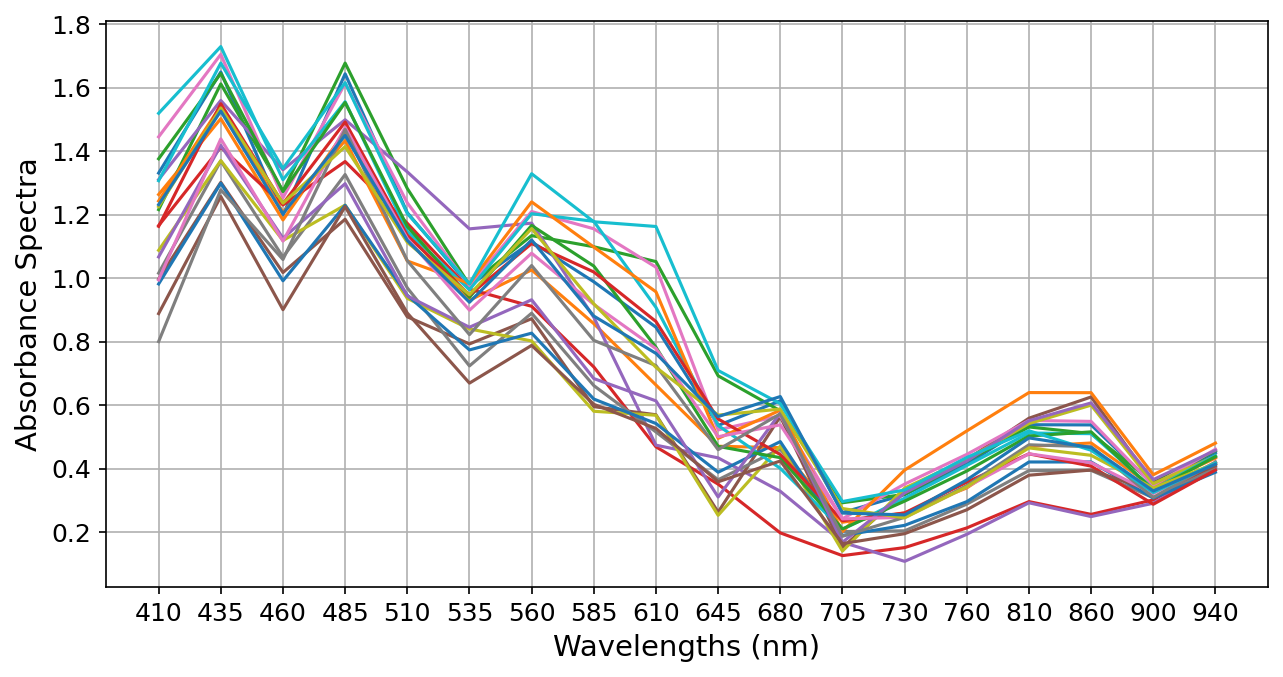

In [11]:
plt.figure(figsize=(10, 5), dpi=150)

for i in range(abs_df_mean.shape[0]):
    plt.plot(wavelengths, abs_df_mean.iloc[i, :-1])

plt.xticks(ticks=list(range(18)), 
            labels=["410", "435", "460", "485", "510", "535", "560", "585", "610", "645", "680", "705", "730", "760",
                    "810", "860", "900", "940"],
            fontsize=12)

plt.yticks(fontsize=12)

plt.xlabel('Wavelengths (nm)', fontsize=14)
plt.ylabel('Absorbance Spectra', fontsize=14)
plt.grid(visible=True)
plt.savefig("C:\\Users\\argan\\OneDrive\\Desktop\\DDP\\Final Report\\turkish_spectra.png")
plt.show()

### Correlation Matrix

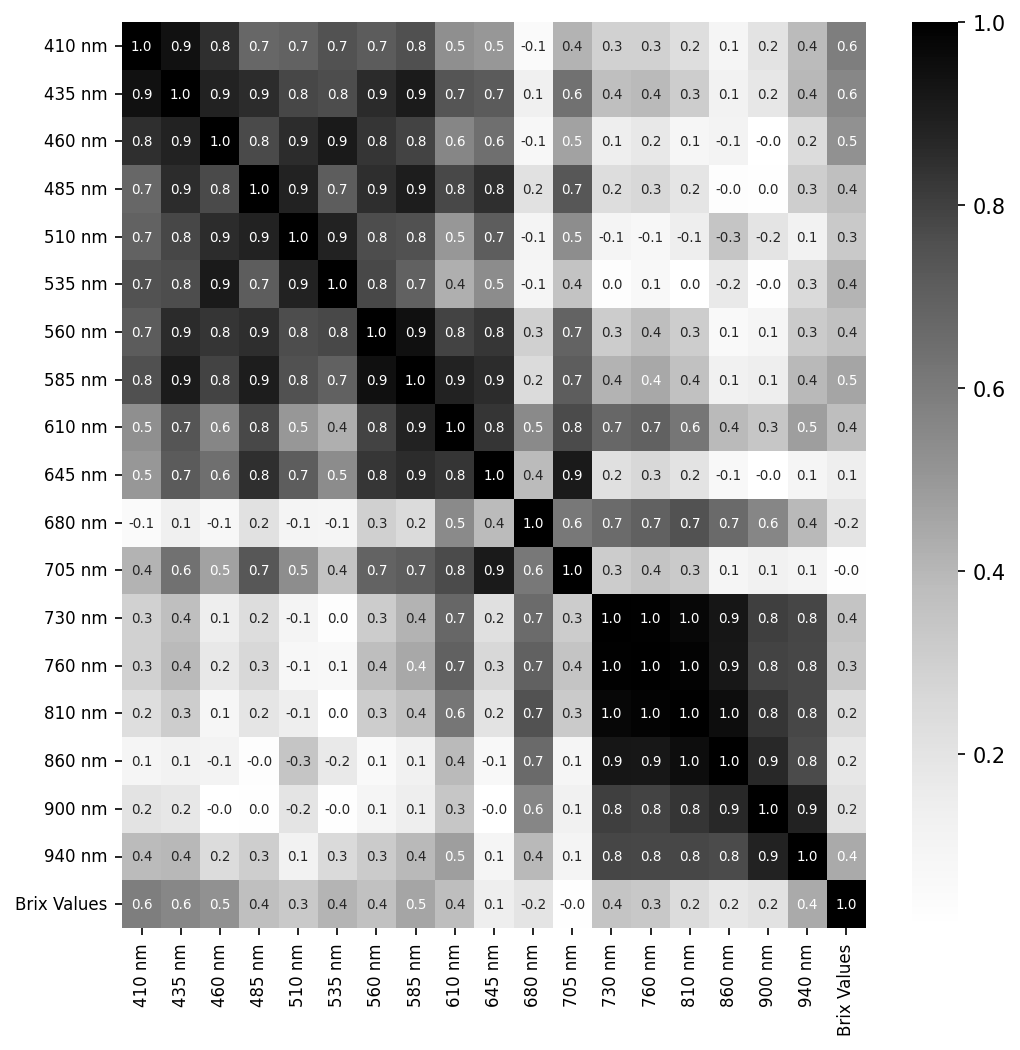

In [10]:
plt.figure(figsize=(8, 8), dpi=150)

sns.heatmap(abs_df_mean.corr().abs(), annot=abs_df_mean.corr().round(decimals=1), fmt=".1f", cmap="Greys", annot_kws={"size":6.5})

plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)

# plt.title("Correlation Matrix", fontweight="bold")
plt.savefig("C:\\Users\\argan\\OneDrive\\Desktop\\DDP\\Final Report\\turkish_corr.png")
plt.show()

### BRIX Values Distribution

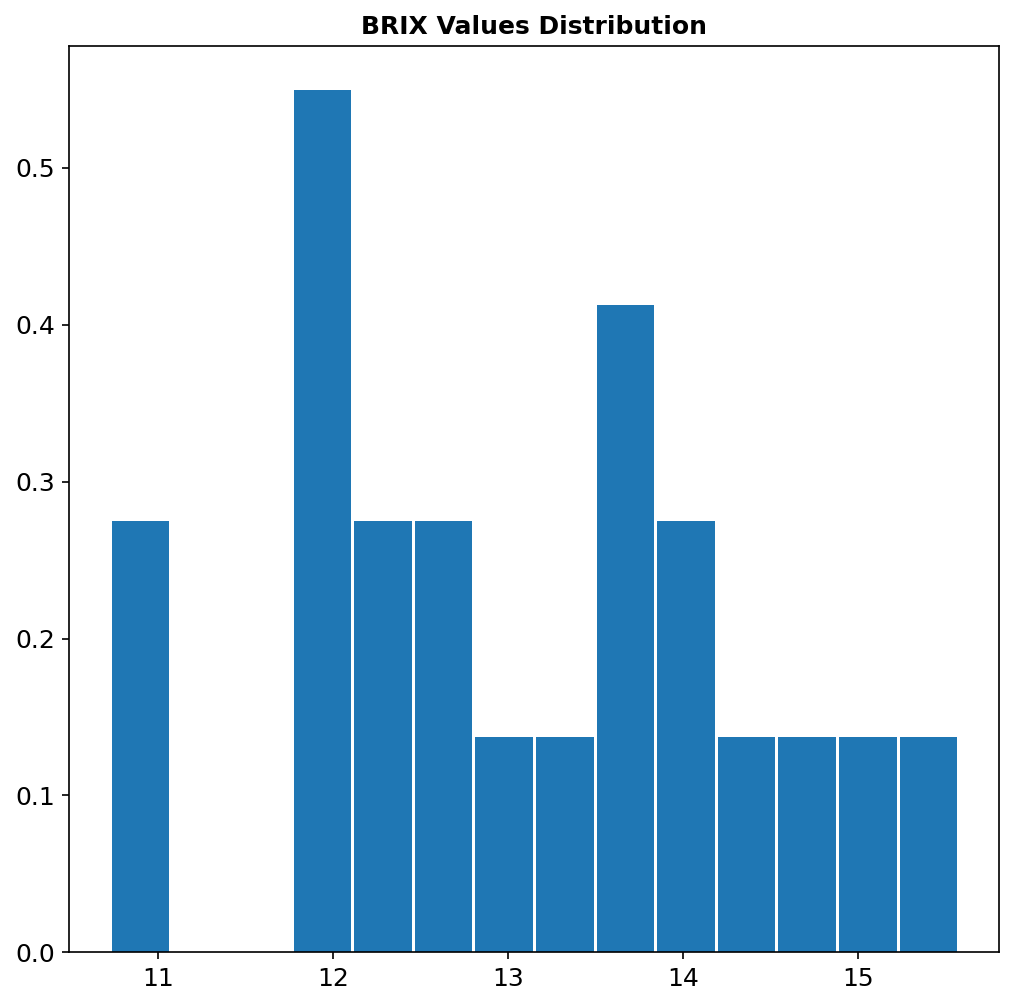

In [6]:
plt.figure(figsize=(8, 8), dpi=150)

plt.hist(abs_df_mean.iloc[:, -1], bins=14, density=True, rwidth=0.95)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title("BRIX Values Distribution", fontweight="bold")
plt.show()

### Correlation Coefficients (Absorbance values with Brix values)

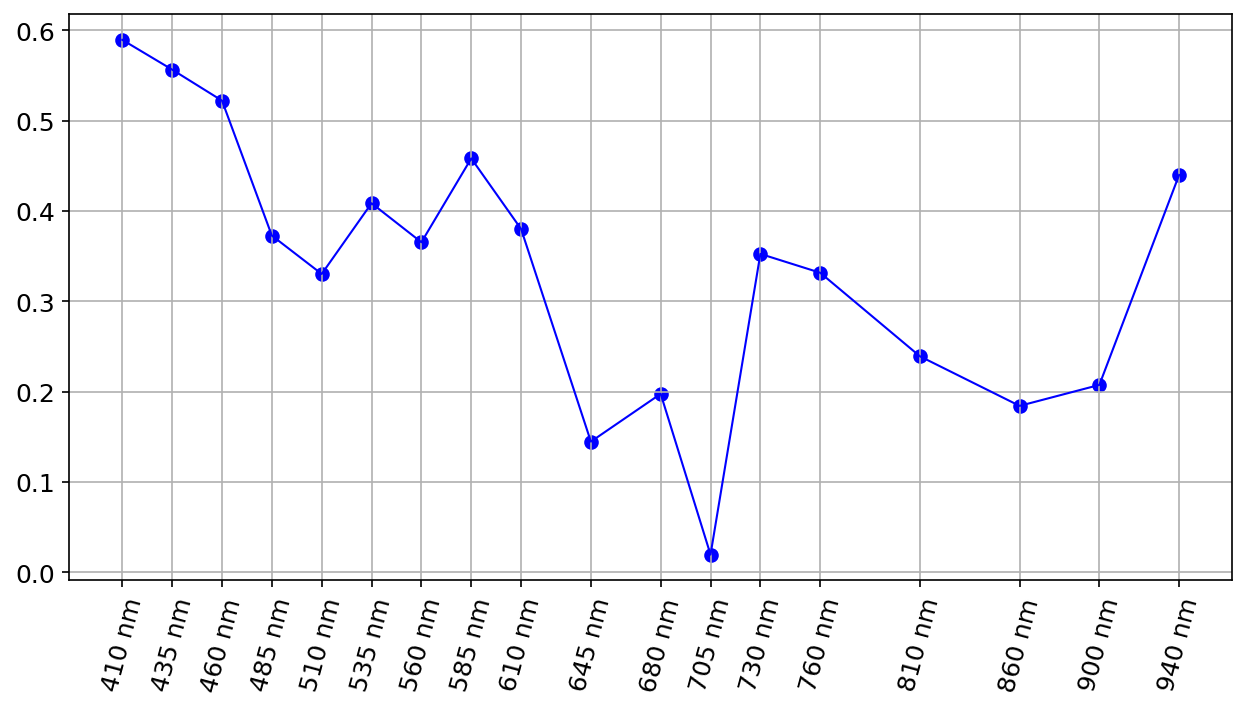

In [9]:
wavelengths_val = []
for w in wavelengths:
    wavelengths_val.append(int(w.split()[0]))

plt.figure(figsize=(10, 5), dpi=150)

plt.plot(wavelengths_val, abs_df_mean.corr().abs().iloc[:, -1][:-1], color='blue', linewidth=1)
plt.scatter(wavelengths_val, abs_df_mean.corr().abs().iloc[:, -1][:-1], color='blue')

plt.xticks(fontsize=12, rotation = 75, ticks=wavelengths_val, labels=wavelengths)
plt.yticks(fontsize=12,)

# plt.title("Correlation Coefficients (Absorbance v/s BRIX Values)", fontweight="bold")
plt.grid()
plt.savefig("C:\\Users\\argan\\OneDrive\\Desktop\\DDP\\Final Report\\turkish_brix_corr.png")
plt.show()

### Scatter Plots

In [20]:
outlier = abs_df_mean.iloc[3, :]

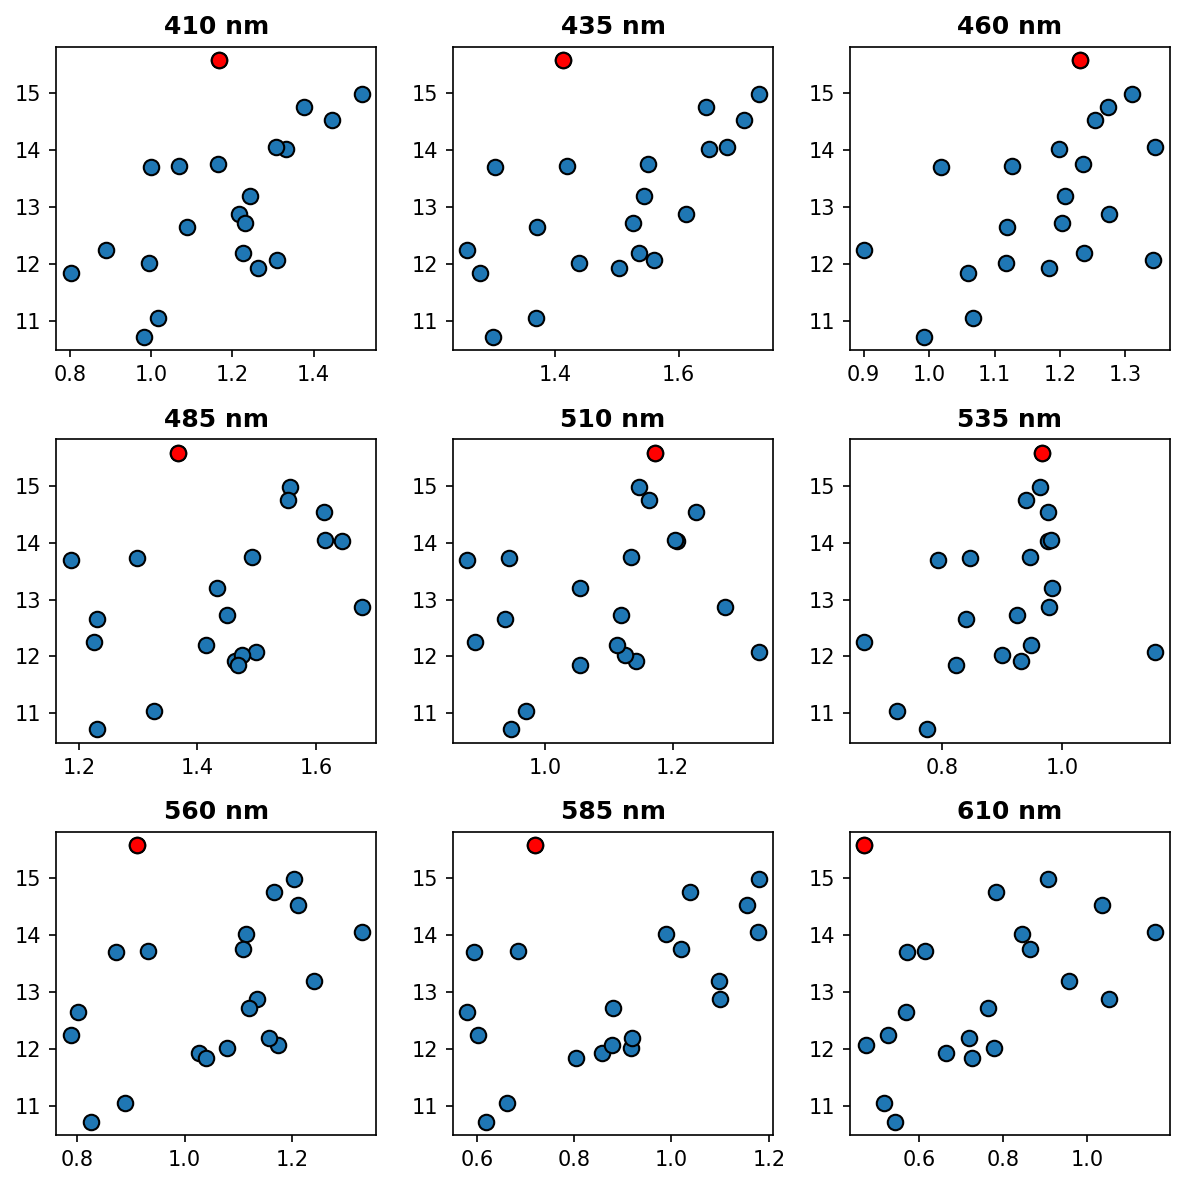

In [23]:
fig, axs = plt.subplots(3, 3, squeeze=False, figsize=(8, 8), dpi=150)

for i, ax in enumerate(axs):
    for j, a in enumerate(ax):
        a.scatter(abs_df_mean.iloc[:, 3*i+j], abs_df_mean.iloc[:, -1], edgecolors='black', s=55)
        a.scatter(outlier.iloc[3*i+j], outlier.iloc[-1], edgecolors='black', c='r', s=55)
        a.set_title(abs_df_mean.columns[3*i+j], fontweight="bold")

fig.tight_layout()
plt.savefig("C:\\Users\\argan\\OneDrive\\Desktop\\DDP\\Final Report\\turkish_scatter_1.png")
plt.show()

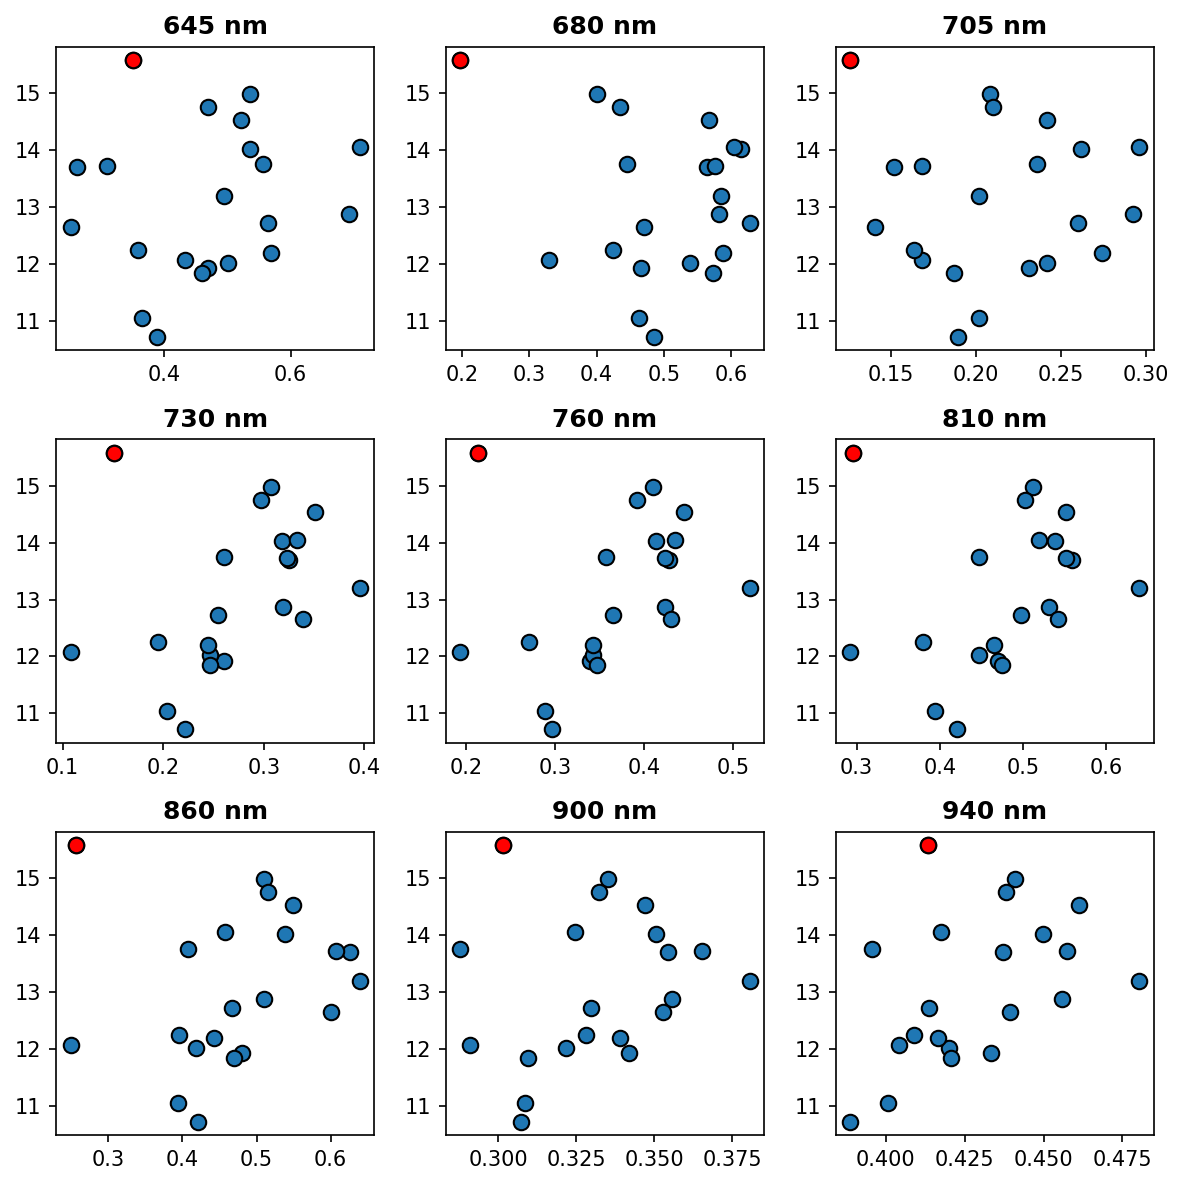

In [24]:
fig, axs = plt.subplots(3, 3, squeeze=False, figsize=(8, 8), dpi=150)

for i, ax in enumerate(axs):
    for j, a in enumerate(ax):
        a.scatter(abs_df_mean.iloc[:, 9+3*i+j], abs_df_mean.iloc[:, -1], edgecolors='black', s=55)
        a.scatter(outlier.iloc[9+3*i+j], outlier.iloc[-1], edgecolors='black', c='r', s=55)
        a.set_title(abs_df_mean.columns[9+3*i+j], fontweight="bold")

fig.tight_layout()
plt.savefig("C:\\Users\\argan\\OneDrive\\Desktop\\DDP\\Final Report\\turkish_scatter_2.png")
plt.show()

### Density Plot

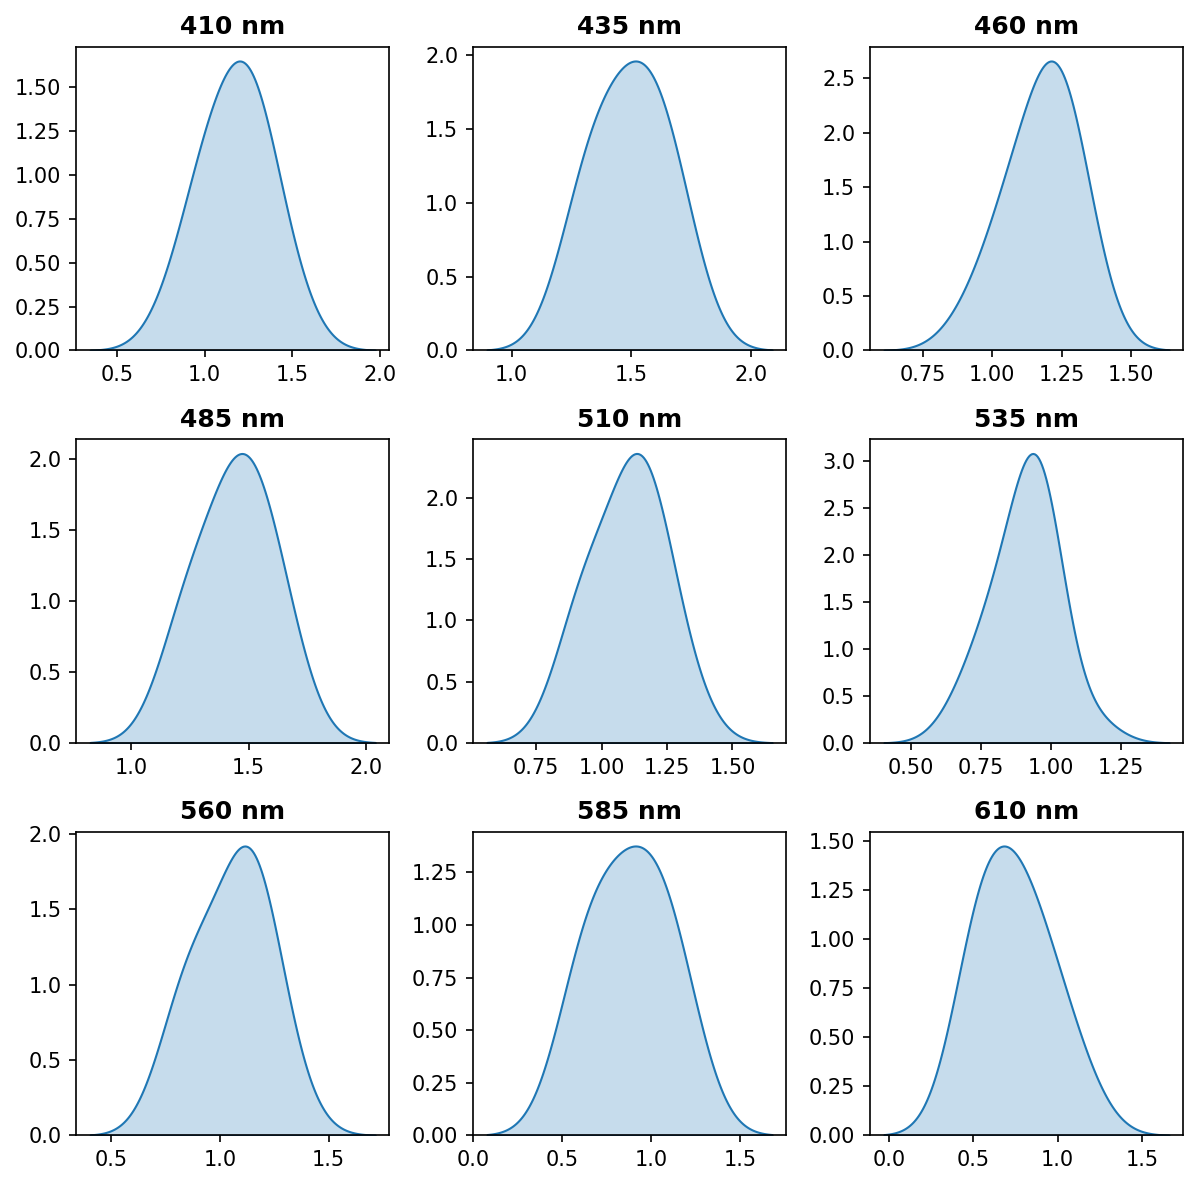

In [27]:
fig, axes = plt.subplots(3, 3, squeeze=False, figsize=(8, 8), dpi=150)

for i, axe in enumerate(axes):
    for j, a in enumerate(axe):
        sns.kdeplot(abs_df_mean.iloc[:, 3*i+j], ax=a, fill=True, bw_adjust=1.5)
        a.set_xlabel("")
        a.set_ylabel("")
        a.set_title(abs_df_mean.columns[3*i+j], fontweight="bold")

fig.tight_layout()
plt.savefig("C:\\Users\\argan\\OneDrive\\Desktop\\DDP\\Final Report\\turkish_dist_1.png")
plt.show()

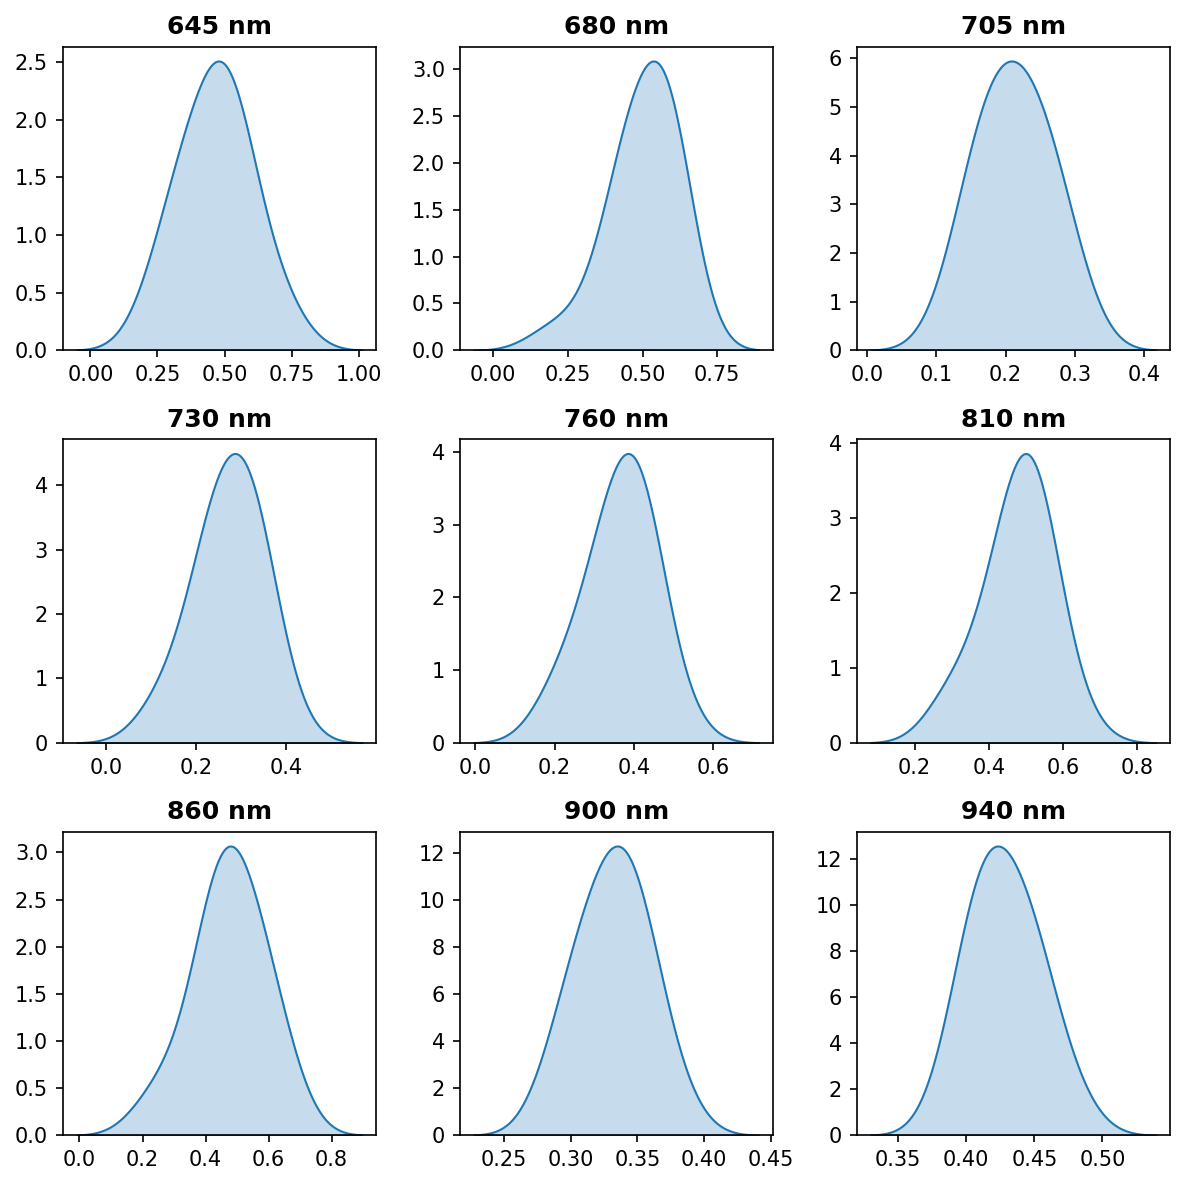

In [29]:
fig, axes = plt.subplots(3, 3, squeeze=False, figsize=(8, 8), dpi=150)

for i, axe in enumerate(axes):
    for j, a in enumerate(axe):
        sns.kdeplot(abs_df_mean.iloc[:, 9+3*i+j], ax=a, fill=True, bw_adjust=1.5)
        a.set_xlabel("")
        a.set_ylabel("")
        a.set_title(abs_df_mean.columns[9+3*i+j], fontweight="bold")

fig.tight_layout()
plt.savefig("C:\\Users\\argan\\OneDrive\\Desktop\\DDP\\Final Report\\turkish_dist_2.png")
plt.show() 